<a href="https://colab.research.google.com/github/jakevetl/learning-sessions/blob/main/trabalho%2Bfinal%2Baula%2B36%2Bprimeir%2Bdesafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o banco de dados


O banco de dados chamado *employee_churn_data.csv* é de uma empresa americana, que prefere manter o anonimato,
onde o setor de RH está preocupado com a rotatividade relativamente alta de seus funcionários, o chamado 'turnouver'.
Eles querem entender a situação como um todo, o motivo que está levando os funcionários a e encontrar maneiras para diminuir a rotatividade.

O banco de dados foi adquirido através do Kaggle e pode ser consultado pelo link abaixo

[Employee turnover](https://www.kaggle.com/datasets/marikastewart/employee-turnover/)

---



# Os dados fornecidos

O departamento de RH reuniu de quase 10 mil funcionários que deixaram a empresa entre os anos de 2016-2020. As informações são provenientes de entrevistas de desligamento, avaliações do desempenho e registros de funcionários.

---

# Sobre as colunas

**departament** - o departamento ao qual o funcionário pertence.

**promoted** - 1 se o funcionário foi promovido nos últimos 24 meses, 0 caso contrário.

**review** - a pontuação composta que o funcionário recebeu na última avaliação.

**projects** - em quantos projetos o funcionário está envolvido.

**salary** - por motivos de confidencialidade, o salário é dividido em três níveis: baixo, médio e alto.

**tenure**- há quantos anos o funcionário está na empresa.

**satisfaction**- uma medida da satisfação dos funcionários a partir de pesquisas.

**bonus**- valor de 1 se o funcionário recebeu bônus nos 24 meses anteriores, 0 caso contrário.

**avg_hrs_month**- a média de horas que o funcionário trabalhou em um mês.
esquerda - “sim” se o funcionário acabou saindo, “não” caso contrário.

---


# Time de cientistas de dados



*   Everton Antonio Pereira Bertolai
*   João Francisco dos Anjos Alvarenga Amante
*   Paulo Borba


---


# Início da análise

In [ ]:
#começamos importando as bibliotecas que podemos utilizar
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
from matplotlib import rc
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency


# **Data acquisition**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Caminhos para os arquivos no Google Drive
%cd '/content/drive/My Drive/Coderhouse'

df=pd.read_csv('employee_churn_data.csv')

/content/drive/My Drive/Coderhouse


# **Início do Data Exploring e Data Wrangling**

In [ ]:
# fornece as colunas gerais
print(df)

      department  promoted    review  projects  salary  tenure  satisfaction  \
0     operations         0  0.577569         3     low     5.0      0.626759   
1     operations         0  0.751900         3  medium     6.0      0.443679   
2        support         0  0.722548         3  medium     6.0      0.446823   
3      logistics         0  0.675158         4    high     8.0      0.440139   
4          sales         0  0.676203         3    high     5.0      0.577607   
...          ...       ...       ...       ...     ...     ...           ...   
9535  operations         0  0.610988         4  medium     8.0      0.543641   
9536   logistics         0  0.746887         3  medium     8.0      0.549048   
9537  operations         0  0.557980         3     low     7.0      0.705425   
9538          IT         0  0.584446         4  medium     8.0      0.607287   
9539     finance         0  0.626373         3     low     7.0      0.706455   

      bonus  avg_hrs_month left  
0    

In [ ]:
#fornece as primeiras 5 linhas
df.head(5)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [ ]:
# fornece as 5 ultimas linhas
df.tail(5)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [ ]:
print("Temos %0.f linhas e %0.f colunas"%(df.shape[0], df.shape[1]))

Temos 9540 linhas e 10 colunas


# **Filtros e seleções**

In [ ]:
df.loc[0:500, 'salary']

0         low
1      medium
2      medium
3        high
4        high
        ...  
496    medium
497    medium
498       low
499       low
500    medium
Name: salary, Length: 501, dtype: object

In [ ]:
#ver os 15 primeiros selecionando apenas as colunas de promoção, nota de avaliação e número de projetos realizados
df.iloc[0:15, 1:4]

,promoted,review,projects
0,0,0.577569,3
1,0,0.751900,3
2,0,0.722548,3
3,0,0.675158,4
4,0,0.676203,3
5,0,0.683206,2
6,0,0.620158,4
7,0,0.499567,4
8,0,0.652818,4
9,0,0.642031,3


In [ ]:
# separar apenas os funcionários que receberam promoção
df[df['promoted']>0]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
131,retail,1,0.656385,3,medium,6.0,0.539634,0,183.862990,no
155,sales,1,0.693354,3,high,6.0,0.437795,0,183.181077,no
162,retail,1,0.653021,3,medium,5.0,0.606442,0,180.140978,no
182,engineering,1,0.624816,3,medium,6.0,0.667644,0,182.446347,no
203,engineering,1,0.557517,4,medium,5.0,0.740531,1,178.688637,no
...,...,...,...,...,...,...,...,...,...,...
9128,retail,1,0.650329,3,medium,8.0,0.689841,1,187.965953,yes
9250,admin,1,0.733896,3,medium,8.0,0.669687,0,187.583195,yes
9330,operations,1,0.580019,3,medium,7.0,0.554910,0,186.958141,yes
9458,engineering,1,0.527559,3,medium,7.0,0.640370,0,187.451126,yes


In [ ]:
#lista de forma decrescente os 10 mais satisfeitos
df.sort_values(by='satisfaction', ascending=False).head(10)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
1755,admin,0,0.405250,4,medium,5.0,1.000000,0,180.046456,no
128,retail,0,0.427174,3,medium,6.0,0.991907,0,181.660999,no
1669,marketing,0,0.560464,3,low,3.0,0.985067,0,175.137585,no
878,engineering,0,0.519063,3,medium,5.0,0.982158,1,179.635759,no
8282,marketing,0,0.564079,4,medium,7.0,0.980994,0,185.174415,yes
1164,operations,0,0.476576,3,medium,6.0,0.957291,0,182.438908,no
2795,engineering,1,0.449686,4,medium,6.0,0.957282,0,181.544990,no
8385,sales,0,0.594348,3,high,7.0,0.950657,0,185.893522,yes
3170,marketing,0,0.524889,4,medium,5.0,0.944516,0,179.024558,no
9035,sales,0,0.414296,3,medium,6.0,0.942021,0,184.316947,yes


# **Estatística descritiva**

In [ ]:
# fornece a análise estatística descritiva
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [ ]:
#separa em percentuais o número de horas trabalhadas por mês
df['avg_hrs_month'].describe(percentiles=[0.1, 0.2, 0.8, 0.99])

count    9540.000000
mean      184.661571
std         4.144831
min       171.374060
10%       179.340896
20%       180.830248
50%       184.628796
80%       188.238263
99%       194.245948
max       200.861656
Name: avg_hrs_month, dtype: float64

In [ ]:
#nos mostra o tempo de casa com o índice de satisfação por departamento
df.groupby('department')['tenure','satisfaction'].mean().sort_values(by='satisfaction', ascending=False)

<ipython-input-28-59fdd10b8772>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('department')['tenure','satisfaction'].mean().sort_values(by='satisfaction', ascending=False)


,tenure,satisfaction
department,,
admin,6.498818,0.519444
IT,6.609551,0.515818
support,6.564626,0.506579
engineering,6.558047,0.504944
operations,6.608410,0.504620
sales,6.535847,0.504520
retail,6.591175,0.502769
marketing,6.503741,0.502411
finance,6.440299,0.497183


In [ ]:
#agora comparando o número de horas trabalhadas por mês com o número de projetos envolvidos, por departamento
pd.pivot_table(df, index=['department'], values=['salary','projects','avg_hrs_month'], aggfunc=np.mean)

<ipython-input-29-f6fbddd0cea6>:1: FutureWarning: The operation <function mean at 0x78e817178550> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  pd.pivot_table(df, index=['department'], values=['salary','projects','avg_hrs_month'], aggfunc=np.mean)


,avg_hrs_month,projects
department,,
IT,184.820946,3.289326
admin,184.538120,3.278960
engineering,184.691962,3.263852
finance,184.375116,3.293532
logistics,184.589924,3.275000
marketing,184.469963,3.280549
operations,184.812006,3.271353
retail,184.735075,3.266061
sales,184.616739,3.286245


# **Análise univariada**

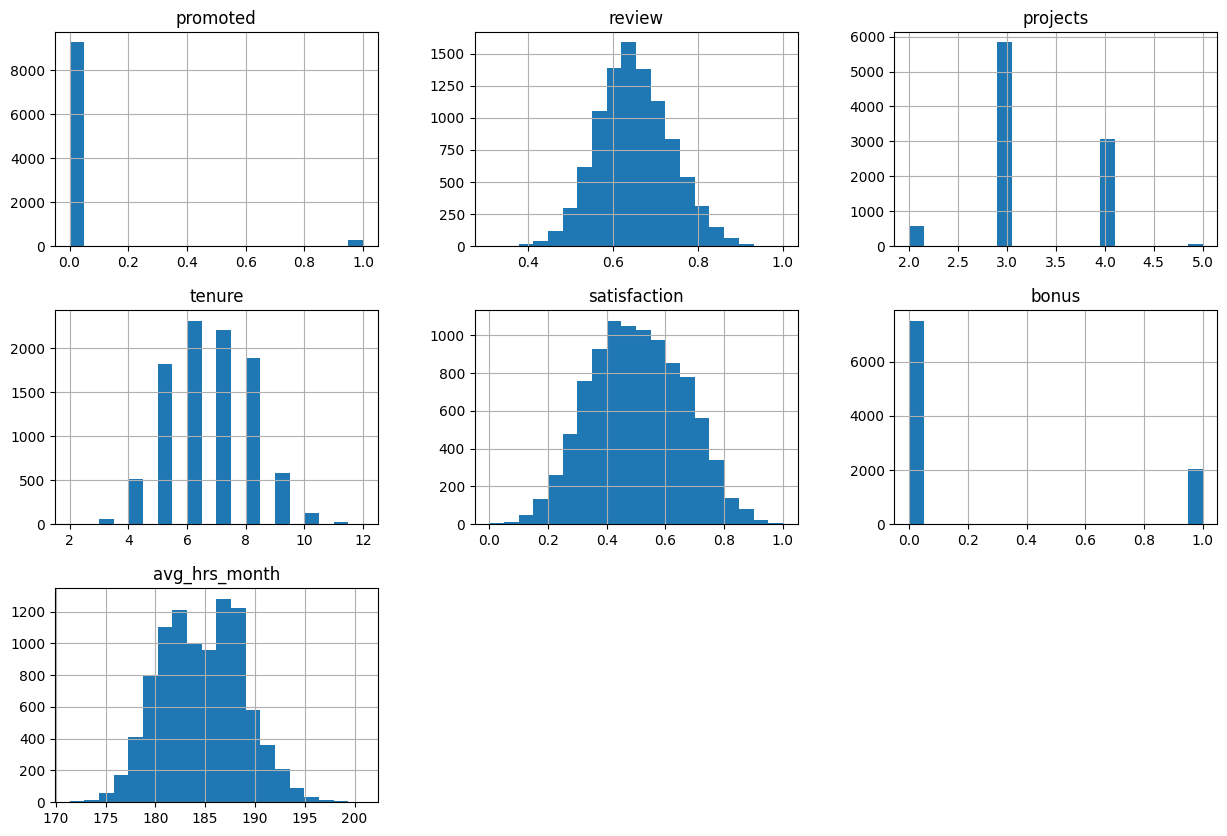

In [ ]:

# Distribuição de cada variável
df.hist(bins=20, figsize=(15, 10))
plt.show()


# **Análise multivariada**

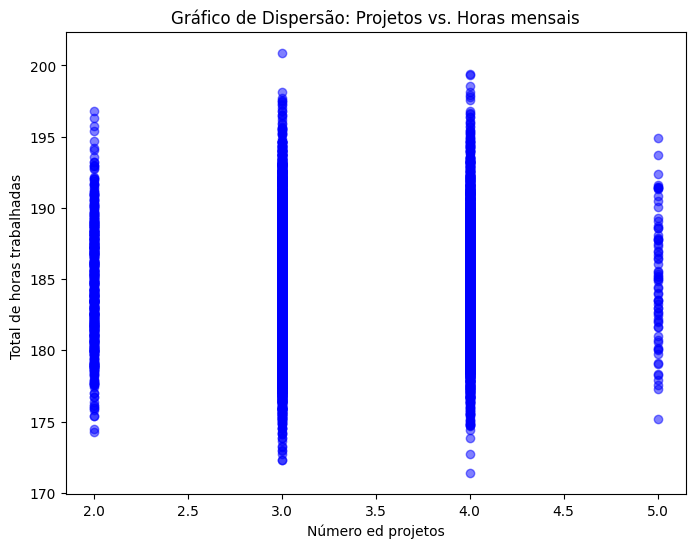

In [ ]:
#Gráfico scatter plot mostrando a relação entre número ed projetos e horas mensais trabalhadas

# Dados
x = df['projects']
y = df['avg_hrs_month']

# Criando o scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)  # c é a cor, alpha é a transparência

# Configura os rótulos dos eixos
plt.xlabel('Número de projetos')
plt.ylabel('Total de horas trabalhadas ')
# Adiciona um título
plt.title('Gráfico de Dispersão: Projetos vs. Horas mensais')

# Exibir o gráfico
plt.show()


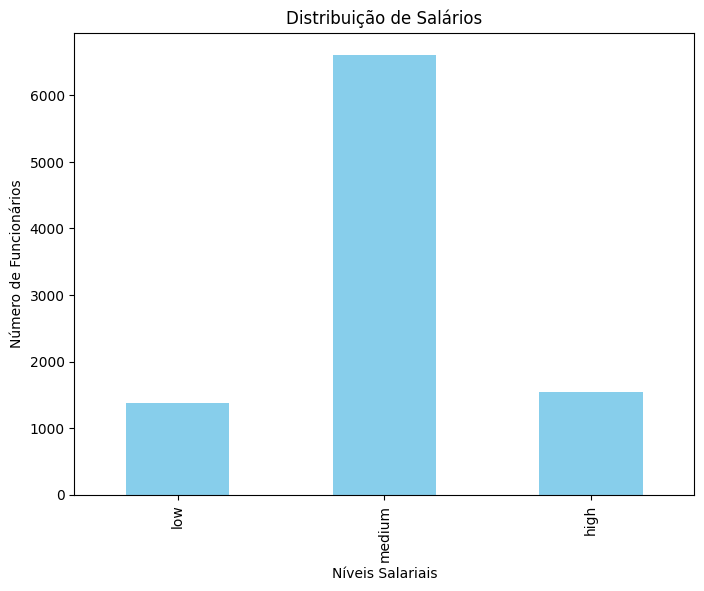

In [ ]:
Média salarial

# Contagem dos valores únicos na coluna 'salary'
salary_counts = df['salary'].value_counts()

# Ordenar os valores pela ordem lógica (baixo, médio, alto)
salary_counts = salary_counts.reindex(['low', 'medium', 'high'])

# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
salary_counts.plot(kind='bar', color='skyblue')

# Configurar rótulos dos eixos e título
plt.xlabel('Níveis Salariais')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição de Salários')

# Mostrar o gráfico de barras
plt.show()


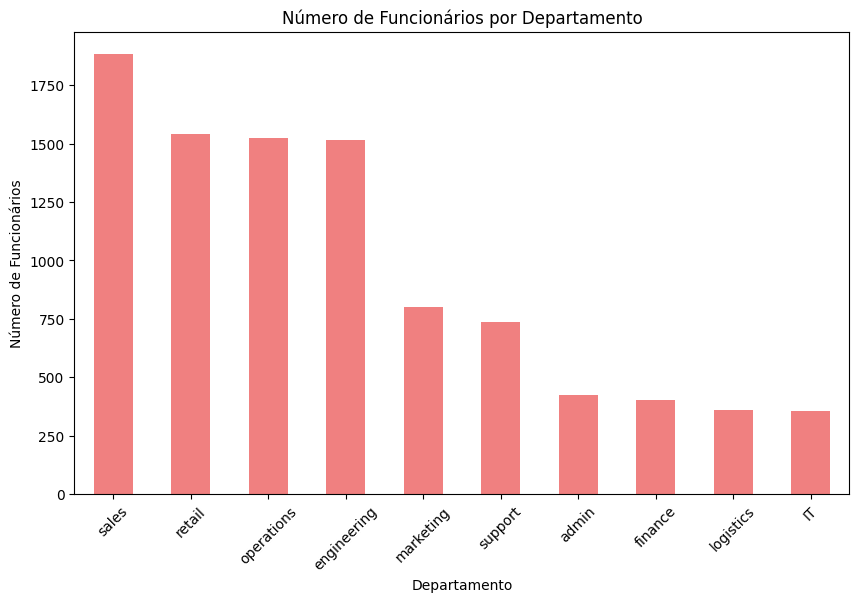

In [ ]:


# Contagem dos funcionários por departamento
department_counts = df['department'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='lightcoral')

# Configurar rótulos dos eixos e título
plt.xlabel('Departamento')
plt.ylabel('Número de Funcionários')
plt.title('Número de Funcionários por Departamento')

# Girar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Mostrar o gráfico de barras
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");

<ipython-input-55-b13268c3e3b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


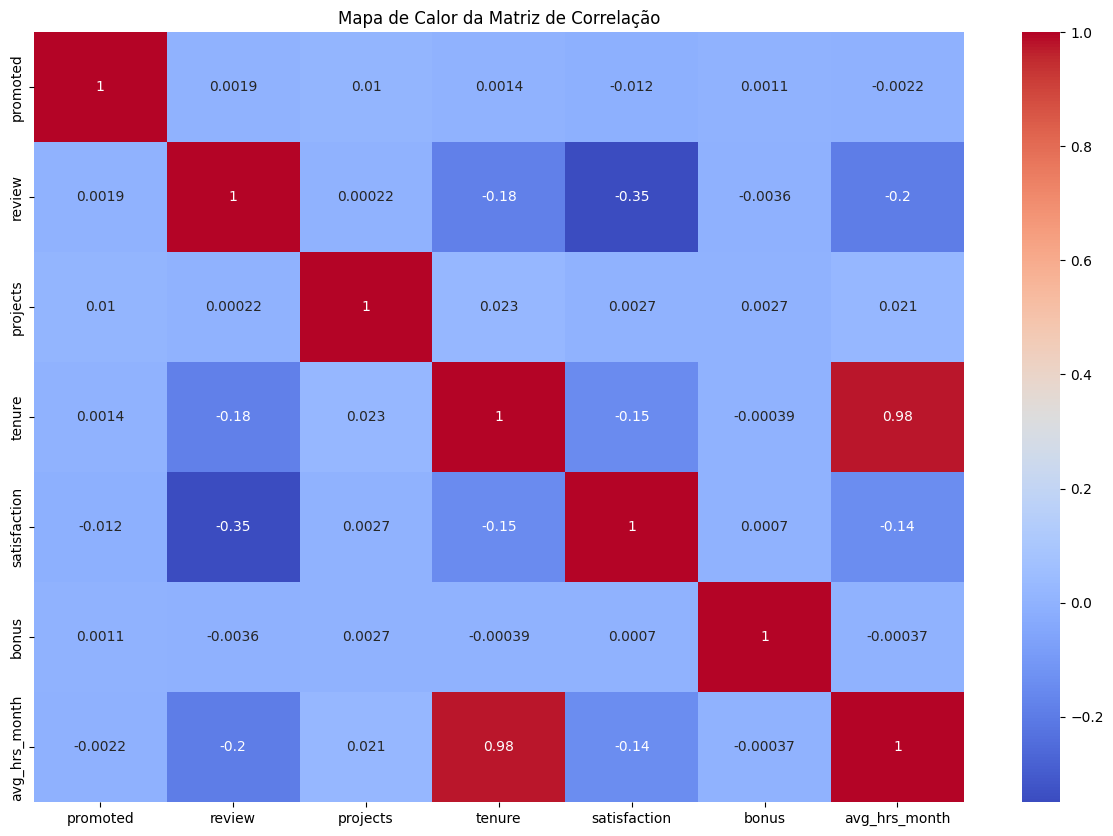

In [ ]:


# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Criar um mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar título
plt.title('Mapa de Calor da Matriz de Correlação')

# Mostrar o mapa de calor
plt.show()


Este é um mapa de correlação que mostra a relação entre várias variáveis, incluindo "promovido", "revisão", "projetos", "tenure", "satisfação", "bônus", etc. Cada célula no mapa representa o coeficiente de correlação entre duas variáveis, variando de -1 (correlação negativa perfeita, indicado em azul escuro) a 1 (correlação positiva perfeita, indicado em vermelho escuro). Se a célula for cinza (valor próximo de 0), isso indica que não há correlação entre as duas variáveis. Porém, algumas colunas ficaram faltando pois não são numéricas.

Para realizarmos uma matriz de correlação, primeiro precisamos codificar as varáiveis não numéricas, como salário, departamento e se o funcionário saiu ou não.

In [ ]:
# Iniciando o LabelEncoder
labelEncoder = LabelEncoder()
df['department'] = labelEncoder.fit_transform(df['department'])

# Mostrará os valores escolhidos para cada departamento
print("Department Encoding:")
for numeric_label, original_value in enumerate(labelEncoder.classes_):
    print(f"Encoded Value: {numeric_label} -> Original Value: {original_value}")

Department Encoding:
Encoded Value: 0 -> Original Value: IT
Encoded Value: 1 -> Original Value: admin
Encoded Value: 2 -> Original Value: engineering
Encoded Value: 3 -> Original Value: finance
Encoded Value: 4 -> Original Value: logistics
Encoded Value: 5 -> Original Value: marketing
Encoded Value: 6 -> Original Value: operations
Encoded Value: 7 -> Original Value: retail
Encoded Value: 8 -> Original Value: sales
Encoded Value: 9 -> Original Value: support


In [ ]:
# FAgora, para codificar os valores da coluna 'salary'
salary_mapping = {
    'low': 0,
    'medium': 1,
    'high': 2
}

# aplica os valores escolhidos para cada opção
df['salary'] = df['salary'].map(salary_mapping)

In [ ]:
# codificando os valores da coluna 'left'
df['left'] = labelEncoder.fit_transform(df['left'])

# Mostra os valores designados para cada opção
print("Left Encoding:")
for numeric_label, original_value in enumerate(labelEncoder.classes_):
    print(f"Encoded Value: {numeric_label} -> Original Value: {original_value}")

Left Encoding:
Encoded Value: 0 -> Original Value: no
Encoded Value: 1 -> Original Value: yes


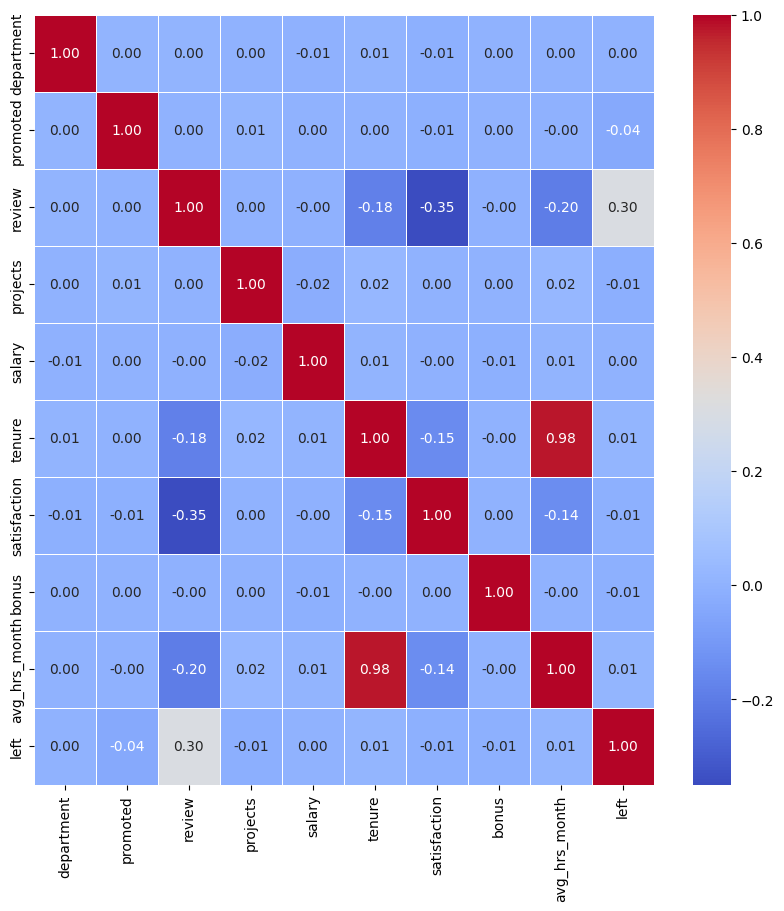

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");

Através do mapa de correlações, vemos que há uma correlação negativa de -0.35 entre o índice de satisfação(satisfaction) e a nota dada(review) por cada funcionário, mostrando que quanto mais insatisfeito, menor a nota fornecida, como já esperado.

Vemos uma correlação positiva com o número de horas trabalhadas por mês(avg_hrs_month) com o tempo de casa(tenure), de 0.98.

Fora isso, vemos uma fraca correlação negativa com o índice de satisfação com o tempo de casa.

Uma das hióteses que podemos testar é em relação ao salário. Funcionários que recebem menos, tendem a sair mais?

In [ ]:
#analisa a relação entre o número de funcionários que saíram (1) dos que ficaram (0) com o salário recebido low (0), medium (1), high (2)
contingency_table = pd.crosstab(df['salary'], df['left'])
print(contingency_table)


# Realiza o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# mostra os resultados obtidos
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Graus de Liberdade: {dof}")
print("Tabela de Frequências Esperadas:")
print(expected)


left       0     1
salary            
0        990   391
1       4660  1951
2       1106   442
Chi-Square Value: 1.1483611437561942
P-Value: 0.5631661539699939
Graus de Liberdade: 2
Tabela de Frequências Esperadas:
[[ 977.99119497  403.00880503]
 [4681.75220126 1929.24779874]
 [1096.25660377  451.74339623]]


A primeira linha de código nos mostra apenas o valor bruto entre o número de funcionários que saíram e os que ficaram, por cada faixa salarial. Para sabermos se é estatisticamente significativo podemos utilizar um teste de qui-quadrado.

Para seguirmos com a interpretação, passaremos um resumo sobre o teste de qui-quadrado:


- **Hipótese Nula (H0):** A hipótese nula do teste qui-quadrado é que as duas variáveis, 'salary' e 'left', são independentes, que não há associação estatisticamente significativa entre o nível de salário e a saída dos funcionários.

- **Hipótese Alternativa (H1):** A hipótese alternativa é que as duas variáveis não são independentes, ou seja, há uma associação significativa entre o nível de salário e a saída dos funcionários.


- **Valor Qui-Quadrado (chi saquare value):** O valor qui-quadrado calculado é uma medida da diferença entre as frequências observadas e as frequências esperadas. Quanto maior o valor, maior a diferença.

- **P valor (P-value):** O valor p é usado para determinar se a associação entre as variáveis é estatisticamente significativa. Um valor baixo de p (geralmente abaixo de um nível de significância escolhido, como 0,05) sugere que as duas variáveis não são independentes e há uma associação significativa.

Se o p valor for  baixo (< 0,05), você pode rejeitar a hipótese nula (H0) e concluir que há uma associação significativa entre o nível de salário e a saída dos funcionários. Isso significa que o nível de salário está relacionado à probabilidade de um funcionário deixar a empresa.

Se o valor p for alto (> 0.05), não há evidências estatísticas para rejeitar a hipótese nula, o que sugere que as duas variáveis são independentes e que o nível de salário não tem uma associação significativa com a saída dos funcionários.

Os resultados do teste qui-quadrado são os seguintes:



- Valor Qui-Quadrado: O valor calculado é de aproximadamente 1.148. Este valor mede a diferença entre as frequências observadas e as frequências esperadas. Quanto maior o valor qui-quadrado, maior a diferença entre as variáveis.

- P valor: O p valor é de 0.563 (> 0.05) sugere que as duas variáveis são independentes, ou seja, não há associação significativa entre o nível de salário e a saída dos funcionários. Não há evidência estatística para rejeitar a hióptese nula (h0)

- Graus de Liberdade: O teste tem 2 graus de liberdade, que é calculado com base no número de categorias nas variáveis envolvidas.

- Tabela de Frequências Esperadas: A tabela de frequências esperadas sob a hipótese nula de independência. Ela mostra as frequências que seriam esperadas se as duas variáveis fossem independentes.

Com base nos resultados, parece que o nível de salário não influencia significativamente a probabilidade de um funcionário deixar a empresa de acordo com este teste.


# **Análise final**

Por enquanto, apenas com as análises realizadas, não encontramos um fator que correlacione com o motivo da saída destes funcionários. Podemos especular